In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

##### This dataset consist of 891 rows and 12 colums

In [5]:
df.size

10692

##### There are in total 10692 entries in the above data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### The count of values present in eachn column along with datatypes

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Count of null values present in dataset

In [10]:
# data cleanind 

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

##### We replaced the null entries with average the average value of ages

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df=df.drop('Cabin',axis=1)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
df['Embarked'].fillna(method = 'backfill', inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Handling null values of Embarked column through backfill method

In [17]:
df.duplicated().sum()

0

##### Hence,there are no duplicated values

In [18]:
df['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

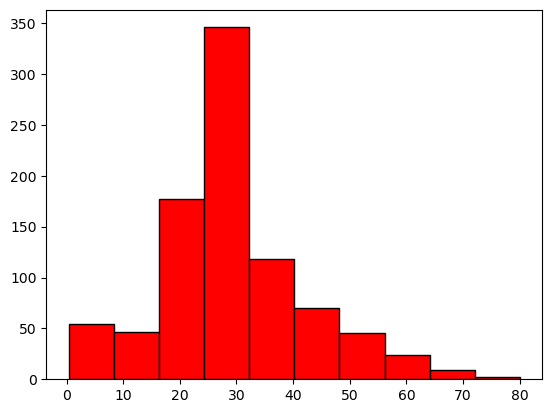

In [19]:
plt.hist(df['Age'], color='red', edgecolor='black');


In [20]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
df['Sex']=le.fit_transform(df['Sex'])

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


In [25]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [26]:
ac=df['Embarked'].value_counts()

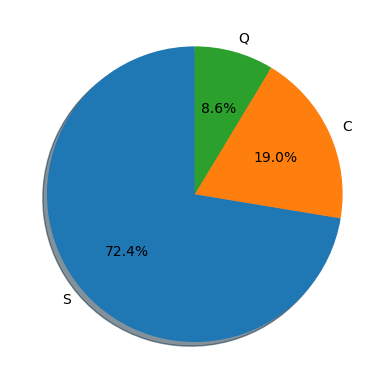

In [27]:
#Distribution of Passengers by Embarkation Port on the Titanic
plt.pie(ac,labels=ac.index,autopct='%2.1f%%',labeldistance=1.1,startangle=90,shadow=True);

##### We can observe that maximum people boarded from S which represents Southampton and minimum people boarded from Q which represents Queenstown

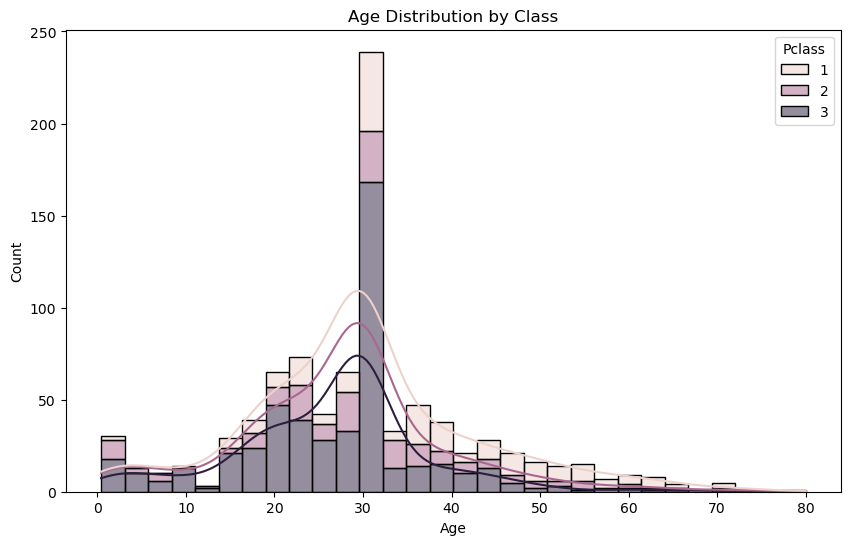

In [28]:
# Age distribution by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', kde=True)
plt.title('Age Distribution by Class')
plt.show()

##### hence in the above histogram we observe that among all the three classes maximum people are in their 30s age group and 
##### 3rd class has maximum population

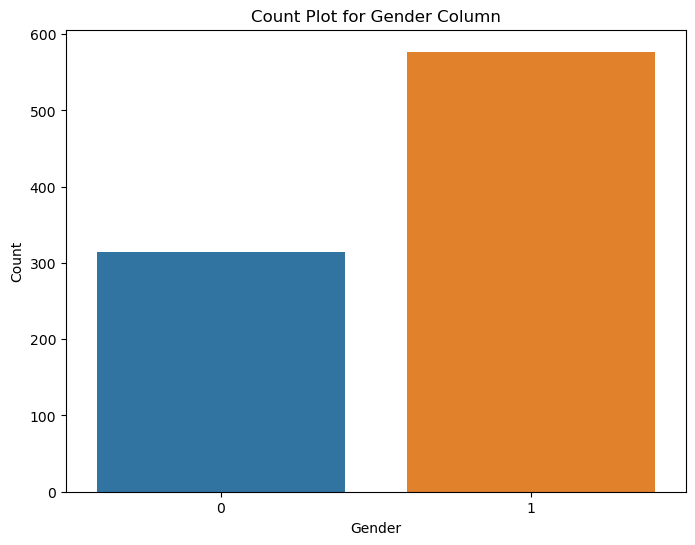

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex')
plt.title('Count Plot for Gender Column')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### Maximum number of males are travelling than number of females

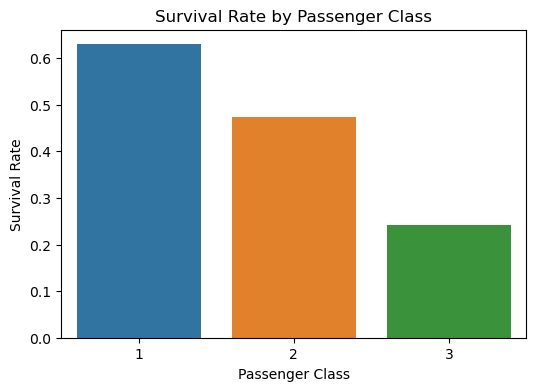

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

##### Maximum people survied from 1st class

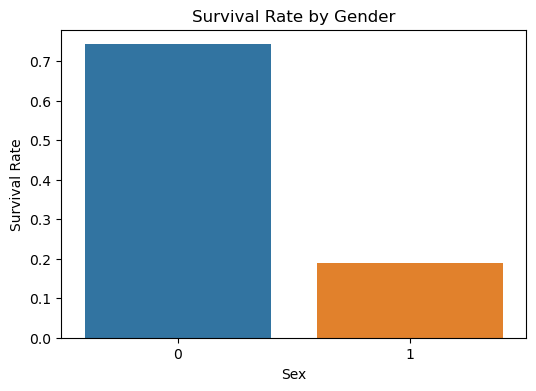

In [31]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

##### Maximum number of females were saved 

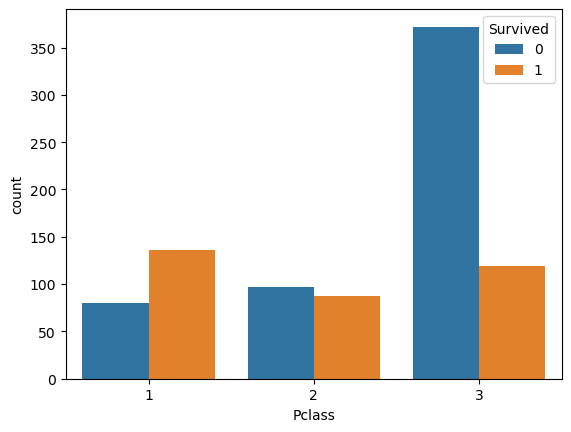

In [32]:
sns.countplot(data=df,x='Pclass', hue='Survived');

##### Maximum people from 1st class were saved hence minimum amongst them died and maximum people from 3rd class died hence minimum amongst them were saved

In [33]:
x= df[['Pclass','Age','Sex']]
y=df['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [36]:
x_train.shape

(668, 3)

In [37]:
y_train.shape

(668,)

In [38]:
x_test.shape

(223, 3)

### Build the model 

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt=DecisionTreeClassifier(random_state=0)

In [41]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred= dt.predict(x_test)

In [43]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [44]:
res=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [45]:
res

,Actual,Predicted
495,0,0
648,0,0
278,0,1
31,1,1
255,1,1
...,...,...
167,0,0
306,1,1
379,0,0
742,1,1


In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

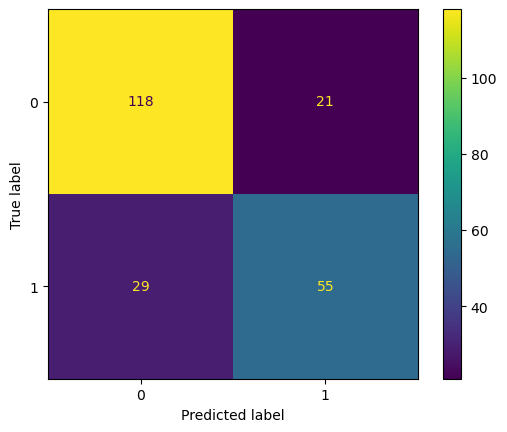

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);



##### 0 is original , 1 is fake
##### 29 - model predicted original but it was fake (False +ve) 
##### 55 - model predicted fake and it was fake (True -ve)
##### 118 - model predicted original and it was original (True +ve)
##### 21 - model predicted fake but it was original (False -ve) 


In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       139
           1       0.72      0.65      0.69        84

    accuracy                           0.78       223
   macro avg       0.76      0.75      0.76       223
weighted avg       0.77      0.78      0.77       223



In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.7757847533632287

In [52]:
from sklearn.tree import plot_tree

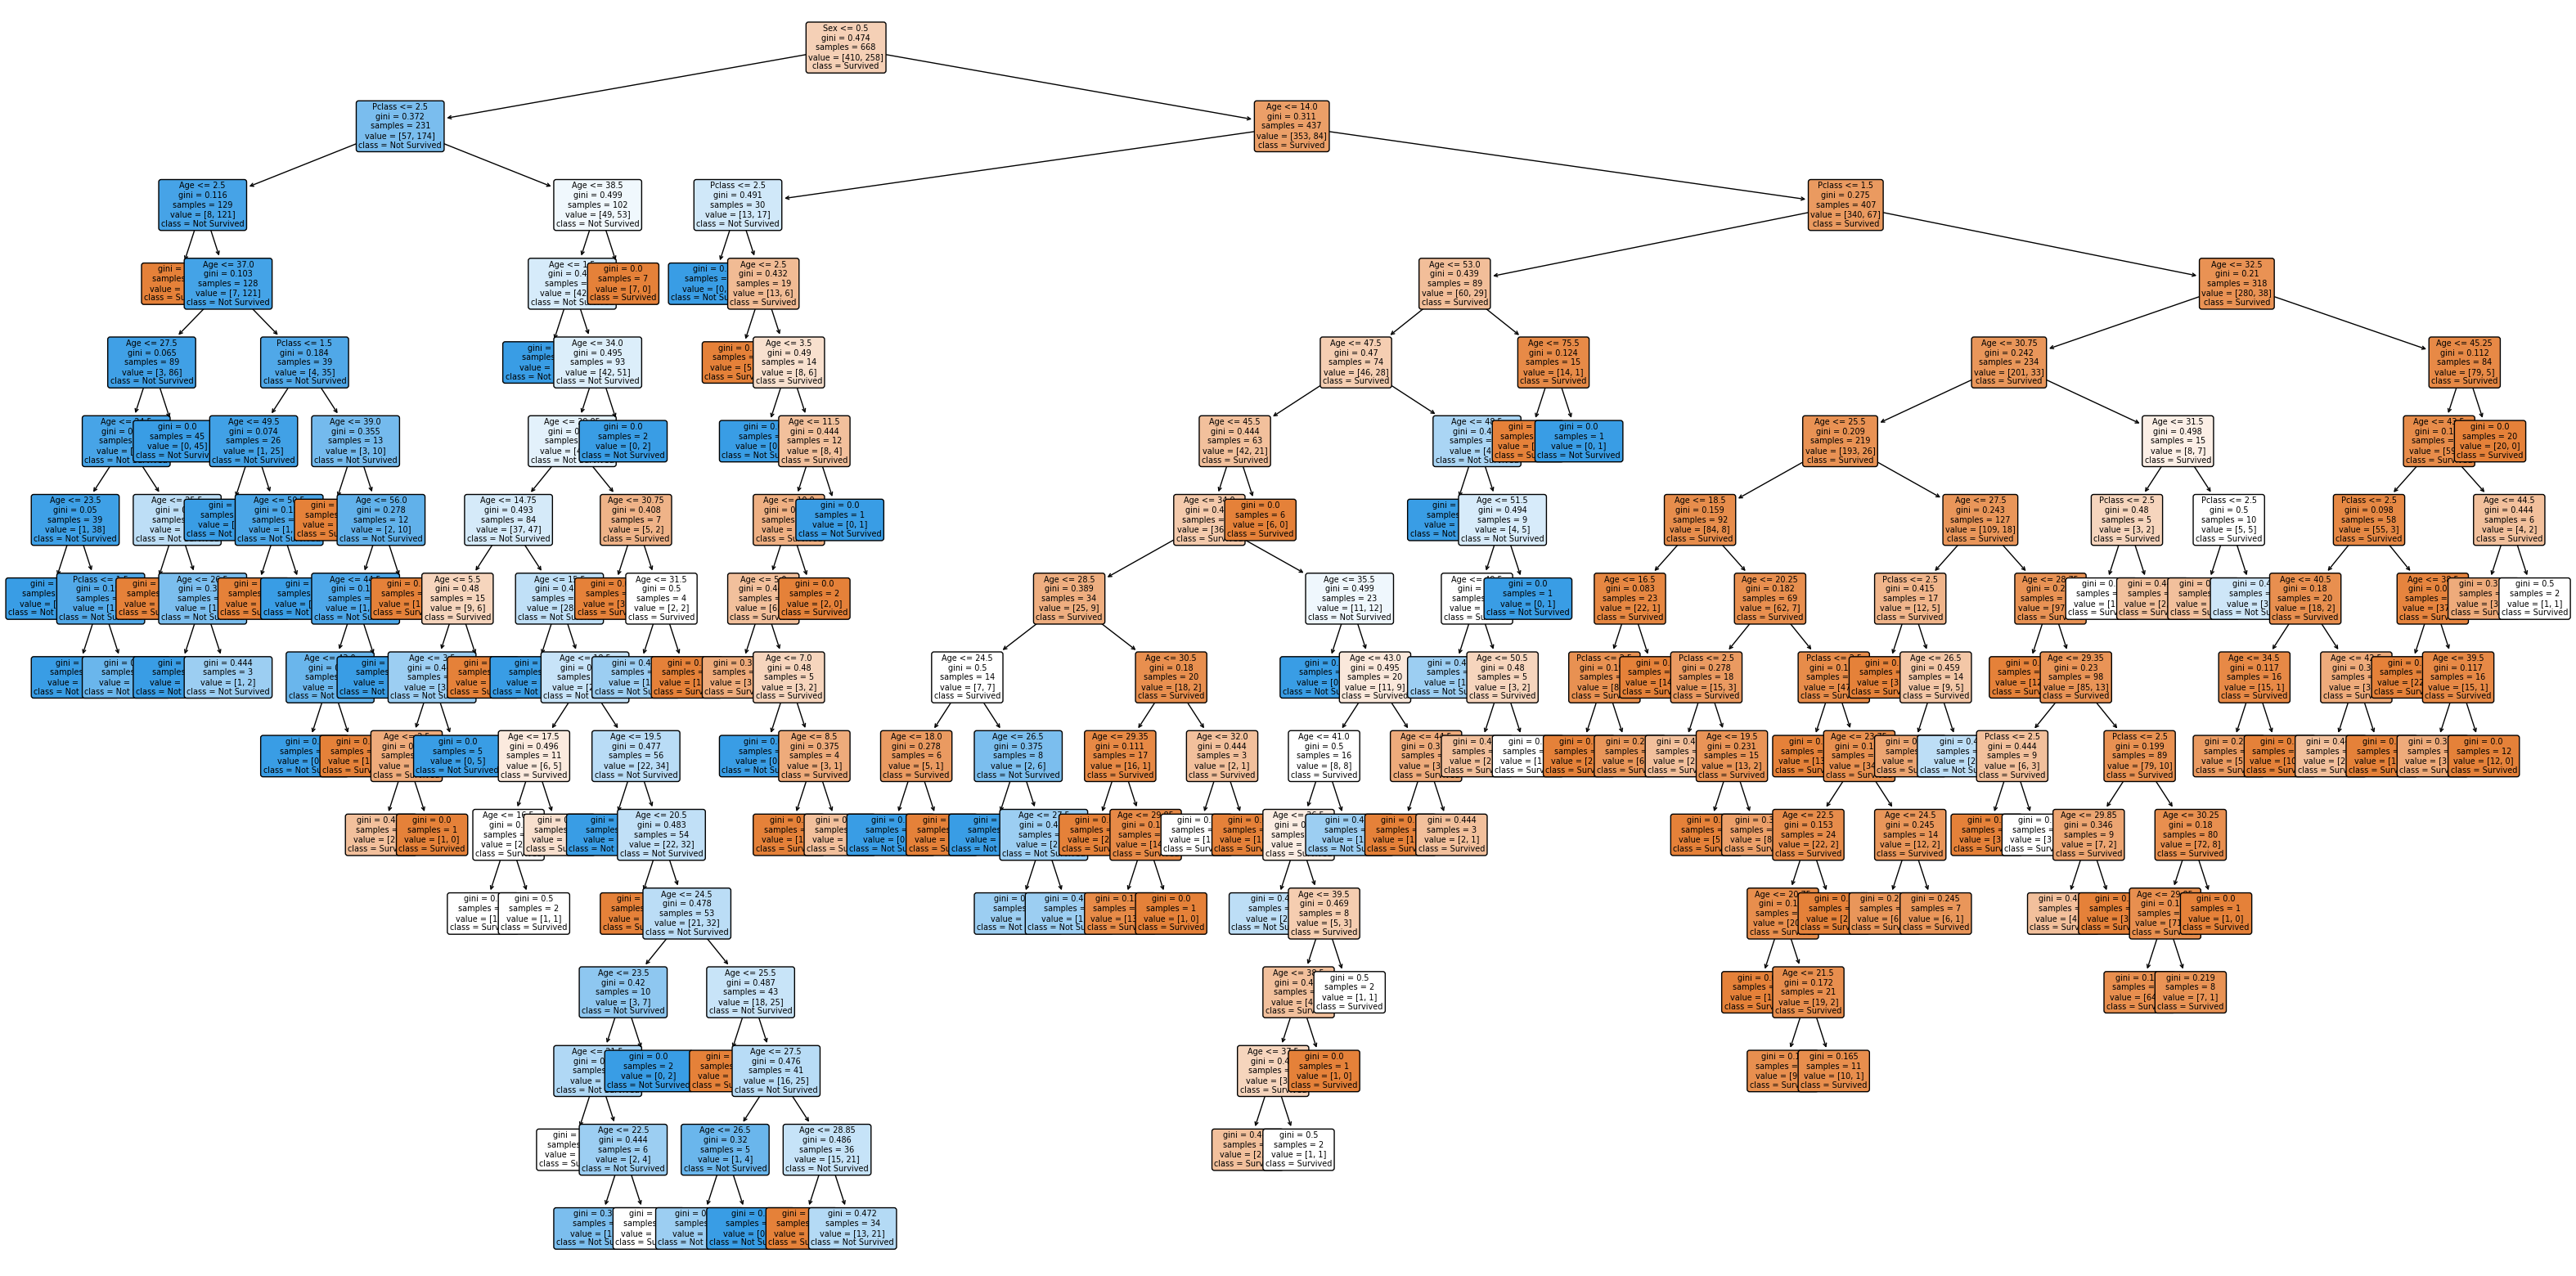

In [53]:
plt.figure(figsize=(40,20))

plot_tree(dt,rounded=True,class_names=['Survived','Not Survived'],feature_names=x.columns,
         filled=True,fontsize=7);

##### Bar plot to visualize importance

In [54]:
dt.feature_importances_

array([0.17027903, 0.37977707, 0.4499439 ])

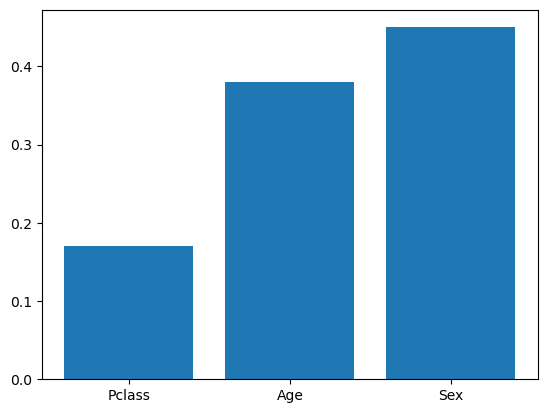

In [55]:
plt.bar(x.columns,dt.feature_importances_);  


##### The importance of columns can be derived from the above graph for predicting output values 
##### Gender column has the highest importance and passenger class column has the least importance as compared to others 